In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

from keras.preprocessing import image



In [2]:
(x_train , y_train),(x_test , y_test) = keras.datasets.mnist.load_data()
print("Training Images " , len(x_train))
print("Testing Images  " , len(x_test))

Training Images  60000
Testing Images   10000


In [3]:
print( "Train Shape :" ,x_train.shape)
print("Test Shape  :" ,x_test.shape)

Train Shape : (60000, 28, 28)
Test Shape  : (10000, 28, 28)


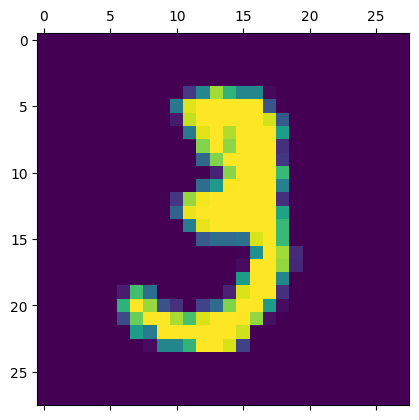

In [4]:
plt.matshow(x_train[10])

In [5]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[10]

np.uint8(3)

Normalizing Training and Testing Data   
i.e.    
Dividing by 255 so that numeric value of each pixel lies between 0 and 1 

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [10]:
x_train_flattened.shape

(60000, 784)

In [11]:
x_train_flattened[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
y_train[:40]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6], dtype=uint8)

In [13]:
y_train[y_train!=9]=0
y_train[y_train==9]=1

In [14]:
y_train[:40]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [15]:
y_test[:40]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1], dtype=uint8)

In [16]:
y_test[y_test!=9]=0
y_test[y_test==9]=1

In [17]:
y_test[:40]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [18]:
newlist=["Not a Nine" , "Its a Nine"]

In [19]:

##-------------------      MODEL 1   (accuracy = 96.43)  NO Hidden Layers-------------------##
# model= keras.Sequential([
#      keras.layers.Dense(2,input_shape=(784,),activation='sigmoid'),
    
# ])

##-------------------      MODEL 2     (accuracy = 99.60) 1 Hidden Layer-------------------##

# model= keras.Sequential([
#     keras.layers.Dense(200,input_shape=(784,),activation='sigmoid'),
#     keras.layers.Dense(50,activation='sigmoid'),
#     keras.layers.Dense(2,activation='sigmoid')
# ])

##-------------------      MODEL 3   (accuracy = 99.62)  4 Hidden Layers-------------------##

# model= keras.Sequential([
#      keras.layers.Dense(380,input_shape=(784,),activation='sigmoid'),
#      keras.layers.Dense(190,activation='sigmoid'),
#      keras.layers.Dense(90,activation='sigmoid'),
#      keras.layers.Dense(40,activation='sigmoid'),
#      keras.layers.Dense(20,activation='sigmoid'),
#      keras.layers.Dense(2,activation='sigmoid')
# ])

##-------------------      MODEL 4   (accuracy = 99.73)  3 Hidden Layers-------------------##


model= keras.Sequential([
     keras.layers.Dense(380,input_shape=(784,),activation='relu'),
     keras.layers.Dense(190,activation='sigmoid'),
     keras.layers.Dense(90,activation='relu'),
     keras.layers.Dense(25,activation='sigmoid'),
     keras.layers.Dense(2,activation='sigmoid')
])


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 380)            │       298,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 190)            │        72,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │        17,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         2,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,207 (1.49 MB)

 Trainable params: 390,207 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit( x_train_flattened, y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9800 - loss: 0.0614
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0266
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0184
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0144
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9965 - loss: 0.0118


In [22]:
model.evaluate(x_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0200


[0.019984213635325432, 0.9934999942779541]

In [23]:
output_model = r"./Models/NineNotNineModel.keras"
os.makedirs(os.path.dirname(output_model), exist_ok=True)


# Save the model
try:
    model.save(output_model)
    print(f"Model saved successfully at: {output_model}")
except Exception as e:
    print(f"Error saving model: {e}")


Model saved successfully at: ./Models/NineNotNineModel.keras


Prediction On Our Test Data

In [24]:
from tensorflow.keras.models import load_model
model = load_model(r"./Models/NineNotNineModel.keras")

In [25]:
y_pridict=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model Pridiction: [0.9819465  0.00600775]

Actaual  Value  : 0  i.e.  Not a Nine
Predicted Value : 0  i.e.  Not a Nine


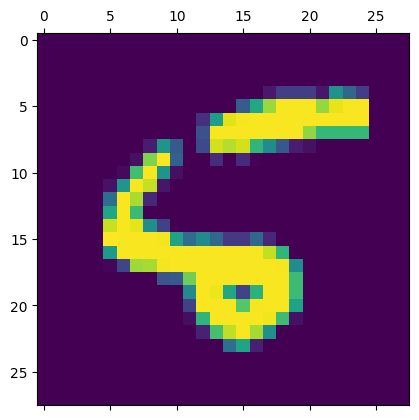

In [26]:
index=8

print("Model Pridiction:",y_pridict[index])
print("\nActaual  Value  :",y_test[index] ," i.e. " , newlist[y_test[index]])
print("Predicted Value :",np.argmax(y_pridict[index])," i.e. " , newlist[np.argmax(y_pridict[index])])
plt.matshow(x_test[index])

In [27]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=uint8)

In [28]:
y_pridict[0]

array([0.98157644, 0.00609832], dtype=float32)

In [29]:
np.argmax(y_pridict[7])

np.int64(1)

In [30]:
y_pridict_label=[ np.argmax(i) for i in y_pridict ]
y_pridict_label[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1)]

Confusion Matrix

In [31]:
cm=tf.math.confusion_matrix(labels= y_test ,predictions=y_pridict_label)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8958,   33],
       [  32,  977]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

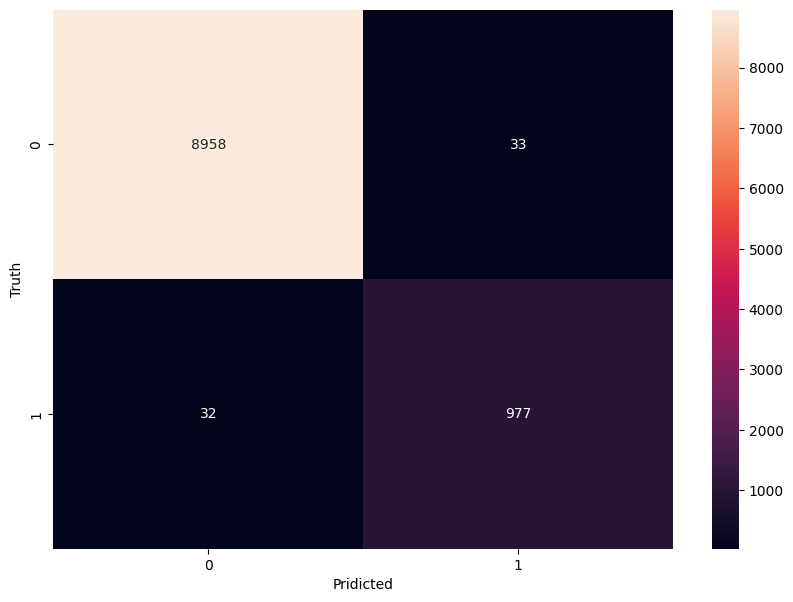

In [32]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Pridicted")
plt.ylabel("Truth")